<a href="https://colab.research.google.com/github/AnhTTM/RISCV/blob/main/Raising_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raising hand
Tổng quan: Bài tập này thực hành lập trình phát hiện giơ tay trong ảnh

Yêu cầu thư viện: OpenCV, matplotlib, mediapipe

### Kết nối tới Google drive trong trường hợp chạy trên colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/BTL_XLA

/content/drive/MyDrive/BTL_XLA


###Copy file haarcascade_frontalface_default.xml

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P /content/drive/MyDrive/XuLyAnh/BTL_XLA

--2022-07-23 02:16:06--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘/content/drive/MyDrive/XuLyAnh/BTL_XLA/haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2022-07-23 02:16:06 (16.3 MB/s) - ‘/content/drive/MyDrive/XuLyAnh/BTL_XLA/haarcascade_frontalface_default.xml’ saved [930127/930127]



### Cài đặt thư viện mediapipe

In [ ]:
pip install mediapipe==0.8.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Import các thư viện cần sử dụng

In [ ]:
import cv2
import numpy
import matplotlib.pyplot as plt
import mediapipe as mp

###Tìm khuôn mặt và xác định kích thước cửa sổ trượt

In [ ]:
def size(sum_w, sum_h, image):
   size_w = 0
   size_h = 0
   faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
   faces = faceCascade.detectMultiScale(
     gray,
     scaleFactor=1.3,
     minNeighbors=1,
     minSize=(1,1)
   )
   for (x, y, w, h) in faces:
      sum_w+=w
      sum_h+=h
      cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
   if(len(faces)!=0):
      size_w = sum_w/len(faces)*3
      size_h = sum_h/len(faces)*4
   plt.imshow(image)
   return size_w, size_h

###Nhận diện trên ảnh

In [ ]:
def pose_person(window_w, window_h, image, i):
   for y in range(0, image.shape[1], int(window_h/3)):
      for x in range(0, image.shape[0], int(window_w/3)):
         result='NO HAND UP'
         patch = (int(window_w), int(window_h))
         center = (x, y)
         image_crop = cv2.getRectSubPix(image, patch, center)
         mp_pose = mp.solutions.pose
         mp_drawing = mp.solutions.drawing_utils
         # Setup the Pose function for images - independently for the images standalone processing.
         pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
         result = detect_handup(image_crop, mp_pose, pose_image, mp_drawing ,0)
         if(result=='HAND UP'):
            if(i==0):
                i+=1
                center_x=x
                center_y=y
                cv2.rectangle(image,(int(x-(window_w/2)),int(y-(window_h/2))),(int(x+(window_w/2)),int(y+(window_h/2))),(255,0,0),2)
                plt.imshow(image_crop)
            else:
                if((center_x - x + window_w)*(center_y - y + window_h)/(window_w*window_h)< 0.2):
                    center_x = x
                    center_y = y
                    cv2.rectangle(image,(int(x-(window_w/2)),int(y-(window_h/2))),(int(x+(window_w/2)),int(y+(window_h/2))),(255,0,0),2)

###Xác định trạng thái giơ tay trên từng cửa sổ trượt

In [ ]:
def detect_handup(image, mp_pose, pose_image,mp_drawing, index):
    annotated_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose_image.process(annotated_image)
    label='NO HAND UP'
    if results.pose_landmarks:
        left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y
    
        right_wrist =  results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y
        
        right_elbow = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y

        left_elbow = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        if (((left_elbow-left_wrist)>0.01)or((right_elbow-right_wrist)>0.01)):
            label ='HAND UP'
        plt.imshow(image)
        plt.show()
    return label


###Xây dựng hệ thống nhận dạng dơ tay

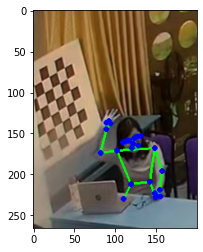

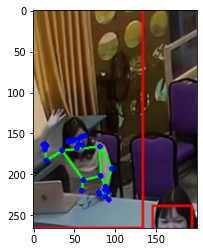

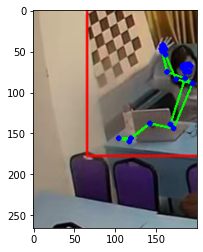

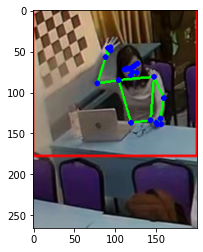

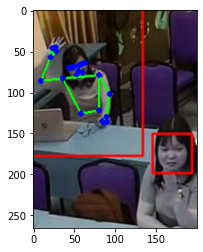

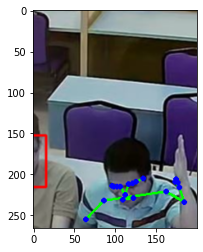

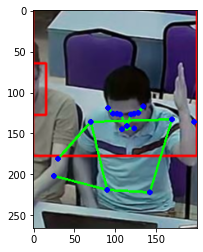

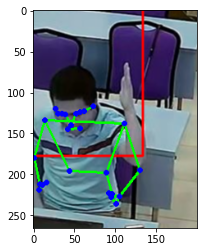

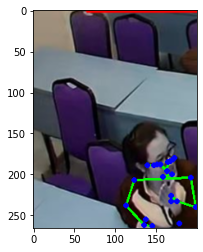

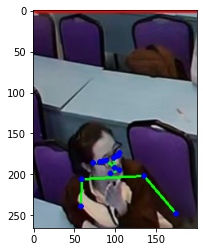

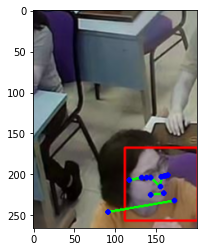

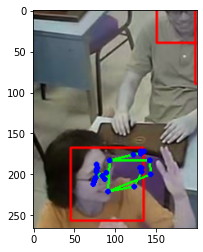

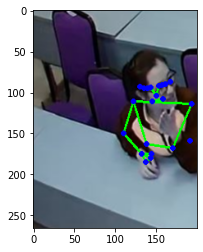

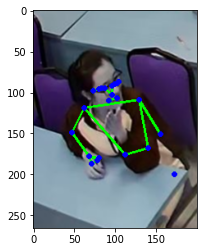

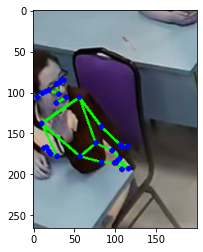

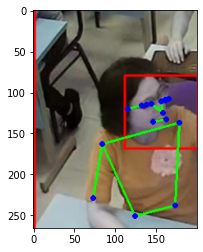

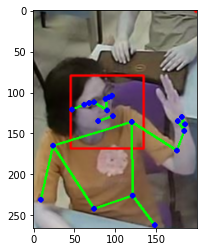

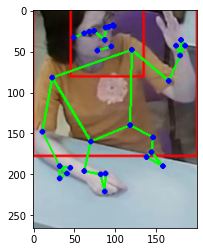

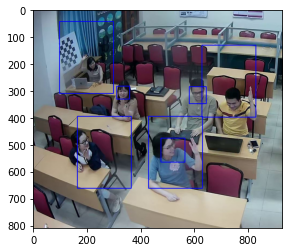

In [ ]:
def main():
   image = cv2.imread('image/hand_up3.jpg')
   plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
   size_w, size_h = size(0,0,image)
   if((size_w!=0) and (size_h!=0)):
      pose_person(size_w, size_h, image, 0)
   else:
      pose_person(image.shape[0], image.shape[1], image, 0)
   plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
main()